<h1>Решение тестового задания</h1>

In [1]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

зададим параметры age и workdays, уровень значимости

In [2]:
age = 35
work_days = 2
alpha = 0.05

In [3]:
#прочитаем данные из файла, важно учесть что файл пришёл с кодировкой, поэтому для корректного отображения данных
#укажем параметр - encoding='cp1251'
lines = []
with open('М.Тех_Данные_к_ТЗ_DS.csv', 'r', encoding='cp1251') as input_file:
    lines = input_file.readlines()

структура данных в DataFrame следующая

In [4]:
from src.classes.utils import create_dataframe

df = create_dataframe(lines)
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


посмотрим на количественные характеристики данных

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Количество больничных дней,237.0,3.257384,1.807821,0.0,2.0,3.0,4.0,8.0
Возраст,237.0,40.181435,6.875157,23.0,36.0,41.0,45.0,60.0


проверим данные на NaN значения, в нашем случае нет пустных ячеек

In [6]:
df.isna().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

<h1>Нормальное распределение</h1>

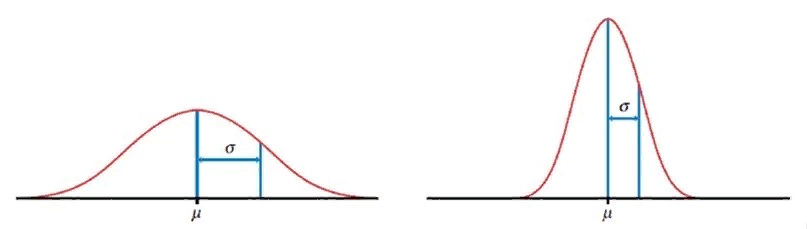

Построим гистограмму распределения количества больничных дней,<br>
Видно, что распределение во всей выборке близкое к нормальному, однако смещено влево вдоль оси х.

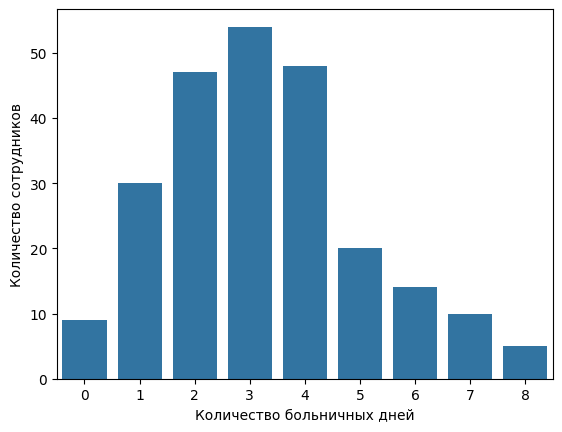

In [7]:
sns.countplot(data=df, x='Количество больничных дней')
plt.ylabel('Количество сотрудников');

для того чтобы в дальнейшем удобно было строить гистограммы для разных возрастов, добавим в DataFrame
колонку показывающую старше ли человек заданного age

In [8]:
def elder_than(x, age):
    if x > age:
        return 'Да'
    
    return 'Нет'

df[f'Cтарше {age}'] = np.vectorize(elder_than)(df['Возраст'], age)

#посмотрим на результат
df.head()

,Количество больничных дней,Возраст,Пол,Cтарше 35
0,5,39,Ж,Да
1,4,54,М,Да
2,4,26,М,Нет
3,5,42,М,Да
4,4,29,М,Нет


Задача была сформулирована следующим образом. Есть ли между двумя группами работников статистически значимая разница больше work_days в количестве пропущенных по болезни рабочих дней.

На языке статистике это формулируется так:<br>
Мы выдвигаем нулевую гипотезу что разница мат. ожиданий двух выборок больше или равна work_days<br>
Против альтернативной гипотезы, что разница меньше мат. ожиданий меньше<br>

$H_0 : M_1 - M_2 >= WorkDays$<br>
$H_1 : M_1 - M_2 < WorkDays$

Левостронний тест!

Проверять мы это будем с помощью <a link='https://www.statology.org/welchs-t-test/'>критерия Уэлча</a>. Его выбор в нашем случае предпочтительнее, чем t-критерий Стъюдента, так как:<br>
Нет оснований полагать что дисперсия выборок равна между собой $\sigma_1^2 \neq \sigma_2^2$<br>
Важное замечание: даже в случае равенства дисперсий, критерий Уэлча будет работать<br>
<br>
Распределение в двух выборках - нормальное смещенное вправо<br>
Но так как выборки достаточно крупные, t-критерий Уэлча всё ещё будет работать.

t-критерий предполагает, что средние значения различных выборок, взятых из генеральной совокупности, нормально распределены. Это не предполагает, что вся генеральная совокупность распределена нормально.

<h1>Пол и work_days</h1>

Для начала построим гистограмму

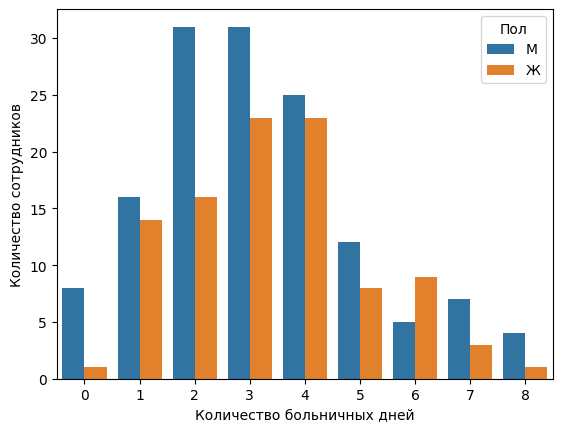

In [9]:
sns.countplot(data=df, x='Количество больничных дней', hue='Пол')
plt.ylabel('Количество сотрудников');

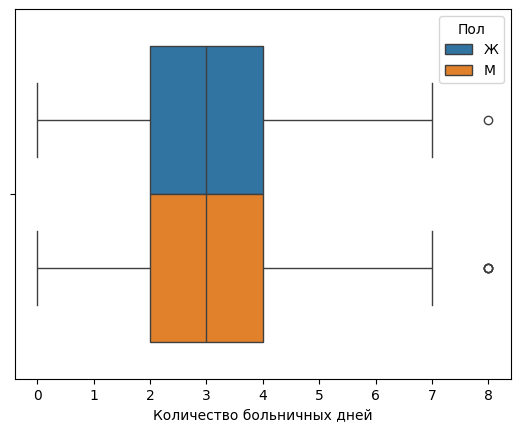

In [10]:
sns.boxplot(data=df, x='Количество больничных дней', hue='Пол');

А вот если посмотреть на этот график, можно заметить, что медиана у двух выборок практически совпадает, также совпадают верхний и нижний квантили

Уже на основании двух выше приведённых графиков, можно предположить что значимой разницы в мат. ожидании этих выборок нет. Но лучше это проверим с помощью критерия Уэлча

In [11]:
from src.classes.statistics import uelch_statistic_check

#разобьём выборки по полу
X1_sex = df[df['Пол'] == 'М']['Количество больничных дней']
X2_sex = df[df['Пол'] == 'Ж']['Количество больничных дней']

result_sex=uelch_statistic_check(X1_sex, X2_sex, work_days, alpha)

if result_sex:
    print('Нулевая гипотеза принимается')
else:
    print('Нулевая гипотеза отколняется в пользу альтернативной')

Нулевая гипотеза отколняется в пользу альтернативной


Как и следовало ожидать, критерий Уэлча показал, что нет оснований полагать о наличии разницы больше work_days в выборках составленных по полу

<h1>Возраст и work_days</h1>

Действия будут аналогичными, для начала построим графики

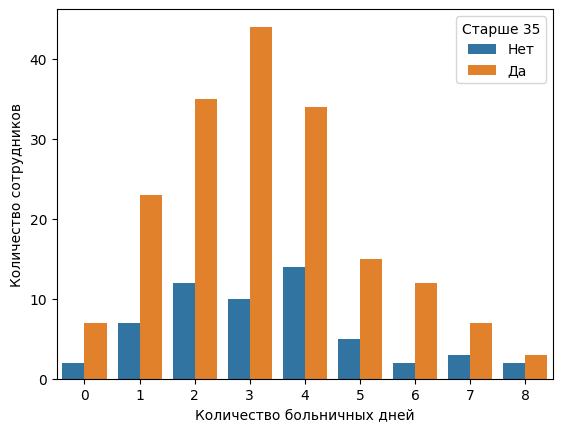

In [12]:
sns.countplot(data=df, x='Количество больничных дней', hue=f'Cтарше {age}')
plt.ylabel('Количество сотрудников');

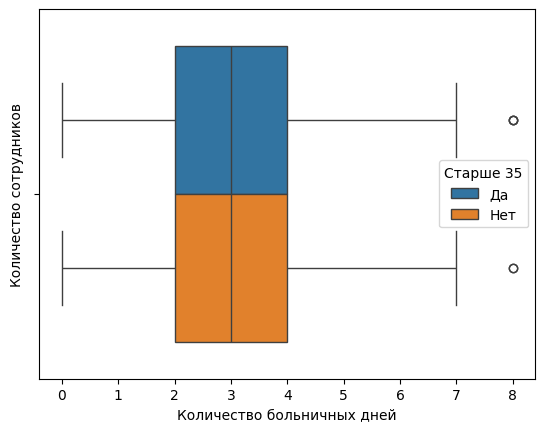

In [13]:
sns.boxplot(data=df, x='Количество больничных дней', hue=f'Cтарше {age}')
plt.ylabel('Количество сотрудников');

Выводы из этих графиков, аналогичны тем, что были получены для выборок по полу

Сделаем проверку по критерию Уэлча

In [14]:
#Составим выборки
X1_age = df[df[f'Cтарше {age}'] == 'Да']['Количество больничных дней']
X2_age = df[df[f'Cтарше {age}'] == 'Нет']['Количество больничных дней']

result_age=uelch_statistic_check(X1_age, X2_age, work_days, alpha)

if result_age:
    print('Нулевая гипотеза принимается')
else:
    print('Нулевая гипотеза отколняется в пользу альтернативной')

Нулевая гипотеза отколняется в пользу альтернативной


Выводы следующие, при заданном параметре age и work_days, нет оснований полагать что есть статистически значимая разница в количестве пропущенных дней